In [38]:
%matplotlib inline
import numpy as np
import pandas as pd
import sqlite3
from scipy import stats, optimize, interpolate
from matplotlib import pyplot as plt

In [237]:
with sqlite3.connect(r'd:\data\scriptie\wrds.sqlite') as con:
    bla = pd.read_sql(
        """select strike_price/close strike, (best_bid+best_offer)/2/close option, rate rf, maturity/365. t , best_bid, best_offer
        from spx where date(observation) = date('2000-09-01') and maturity=15 order by strike""",
        con)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1735: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0


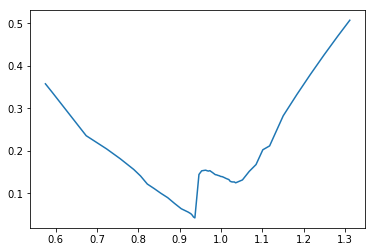

In [238]:
bla['imp_vol'] = bla.apply(lambda row: optimize.minimize_scalar(C(row), method='golden', tol=1e-12).x, axis=1)
optimize.minimize_scalar(C(bla.iloc[1,:]), method='golden', tol=1e-12)
plt.plot(bla.strike, bla.imp_vol)
# bla

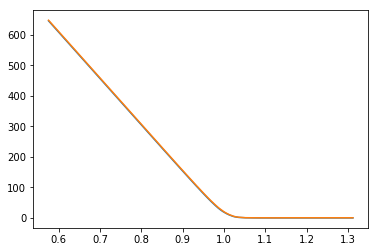

In [239]:
plt.plot(bla.strike, bla.best_bid, bla.strike, bla.best_offer)

In [199]:
def C(row):
    ks, cs, t, r = row.loc[['strike', 'option', 't', 'rf']].values
    def blep(sigma):
        d1 = ( sigma/2 + r/sigma )*np.sqrt(t) - np.log(ks)/np.sqrt(t)/sigma
        return ( stats.norm.cdf(d1) - ks*np.exp(-r*t)*stats.norm.cdf(d1-sigma*np.sqrt(t)) - cs )**2
    return blep
    # TODO
    
    # HIERO HIER WAS JE HIERO KIJK DAN
    
# C = lambda s, t: lambda sigma: s*(stats.norm.cdf(sigma/2*np.sqrt(t)) - stats.norm.cdf(-sigma/2*np.sqrt(t)))
# L = lambda t, cs: lambda sigma: ( 2*stats.norm.cdf(sigma/2*np.sqrt(t)) - 1 - cs)**2

In [39]:
options = pd.read_csv('options.csv').drop(['secid', 'index_flag', 'issue_type'], axis=1)
zerocd = pd.read_csv('zero_coupon_dividend.csv')
options.date = pd.to_datetime(options.date, format='%Y%m%d')
zerocd.date = pd.to_datetime(zerocd.date, format='%Y%m%d')
options['premiumfrac'] = options.premium / options.forward_price
options['T'] = options.days/364

In [31]:
options.zerocd = np.log(options.zerocd.div(100).add(1))
calls = options.loc[options.cp_flag == 'C', :]
puts = options.loc[options.cp_flag == 'P', :]

In [37]:
# options['my_imp_vol'] = options.apply(lambda row: optimize.minimize_scalar(Crow).x, axis=1)
optimize.minimize_scalar(C( options.loc[5662, :] ))
# options.loc[5662, ['T', 'premiumfrac']].values

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


     fun: 1.6020826735645903e-24
    nfev: 12
     nit: 11
 success: True
       x: 0.18237500122151623

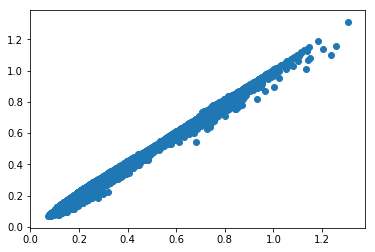

In [86]:
# options.merge(sec, on=['date', 'ticker'])
# sec.loc[sec.volume > 0, :]
options.loc[options.date=='2006-05-19']
# sec.loc[sec.date == '2006-05-19']
# _x = np.arange(-3,3,.01)
# plt.plot(_x, stats.norm.cdf(_x) - stats.norm.cdf(-_x), 'b')
# plt.plot(_x, 2*stats.norm.cdf(_x)-1, 'k')
plt.scatter(options.my_imp_vol, options.impl_volatility)